In [2]:
import iris
import glob
import os, sys
import matplotlib.pyplot as plt
import iris.plot as iplt
import numpy

cwd = os.getcwd()
repo_dir = '/'
for directory in cwd.split('/')[1:]:
    repo_dir = os.path.join(repo_dir, directory)
    if directory == 'ocean-analysis':
        break

modules_dir = os.path.join(repo_dir, 'modules')
sys.path.append(modules_dir)

import general_io as gio

/g/data/r87/dbi599/miniconda3/envs/ocean/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/g/data/r87/dbi599/miniconda3/envs/ocean/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/g/data/r87/dbi599/miniconda3/envs/ocean/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/g/data/r87/dbi599/miniconda3/envs/ocean/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [9]:
basin_numbers = {'North Atlantic': 11,
                 'South Atlantic': 12,
                 'North Pacific': 13,
                 'South Pacific': 14,
                 'Indian': 15,
                 'Arctic': 16,
                 'Marginal Seas and Land': 17}


def plot_timeseries(hist_cube, ssp_cube, control_cube, basin_name, quarterdeg=False):
    """Plot timeseries for each temperature bin of an ocean basin."""

    basin_number = basin_numbers[basin_name]
    
    if quarterdeg:
        selected_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, -1]
    else:
        selected_bins = numpy.arange(0, hist_cube.shape[1])
    
    for temp_index in selected_bins:
        hcube = hist_cube[:, temp_index, :]
        hcube = hcube.extract(iris.Constraint(region=basin_number))
        if control_cube:
            ccube = control_cube[:, temp_index, :]
            ccube = ccube.extract(iris.Constraint(region=basin_number))
        if ssp_cube:
            scube = ssp_cube[:, temp_index, :]
            scube = scube.extract(iris.Constraint(region=basin_number))
            
        temperature = hcube.coord('sea_water_potential_temperature').points[0]
    
        iplt.plot(hcube, color='blue', label='historical')
        if control_cube:
            iplt.plot(ccube, color='black', label='piControl')
        if ssp_cube:
            iplt.plot(scube, color='red', label='SSP')
        
        plt.title(basin_name + ', ' + str(temperature) + 'C')
        plt.ylabel('%s (%s)'  %(hcube.long_name, hcube.units))
        plt.legend()
        plt.show()

In [10]:
hist_files = glob.glob('/g/data/r87/dbi599/CMIP6/CMIP/CCCma/CanESM5/historical/r1i1p1f1/Omon/water-mass/gn/v20190429/water-mass_Omon_CanESM5_historical_r1i1p1f1_gn_*.nc')
hist_files.sort()
hist_vcube, history = gio.combine_files(hist_files, 'ocean_volume')
hist_vcube.summary(shorten=True)

'ocean_volume / (m3)                 (year: 165; sea_water_potential_temperature: 44; region: 7)'

The volume times salinity and volume times temperature timeseries look much the same as the volume timeseries because volume is the dominant term.

In [11]:
ssp_files = glob.glob('/g/data/r87/dbi599/CMIP6/ScenarioMIP/CCCma/CanESM5/ssp585/r1i1p1f1/Omon/water-mass/gn/v20190429/water-mass_Omon_CanESM5_ssp585_r1i1p1f1_gn_*.nc')
ssp_files.sort()
ssp_vcube, history = gio.combine_files(ssp_files, 'ocean_volume')
ssp_vcube.summary(shorten=True)
#ssp_vcube = None

'ocean_volume / (m3)                 (year: 286; sea_water_potential_temperature: 44; region: 7)'

In [12]:
#control_files = glob.glob('/g/data/r87/dbi599/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/piControl/r1i1p1f1/Omon/water-mass/gn/v20190710/water-mass_Omon_MPI-ESM1-2-HR_piControl_r1i1p1f1_gn-quarterdegC_*.nc')
#control_files.sort()
#control_vcube, history = gio.combine_files(control_files, 'ocean_volume')
#control_vcube.summary(shorten=True)
control_vcube = None

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]


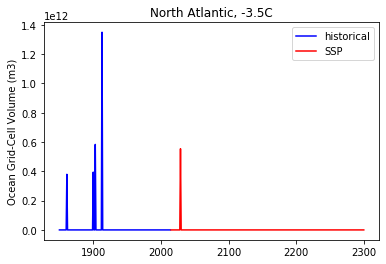

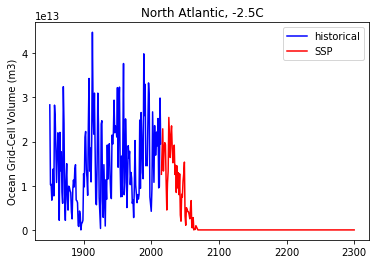

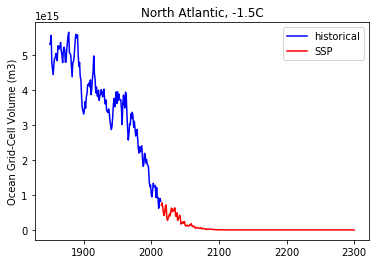

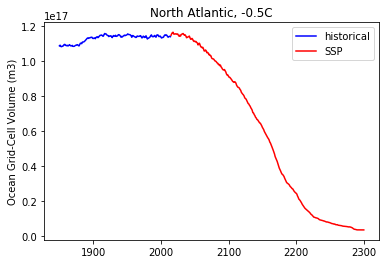

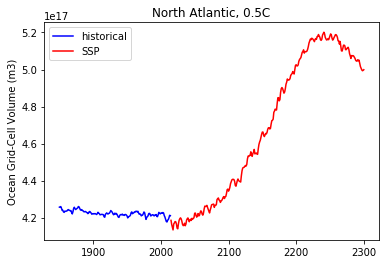

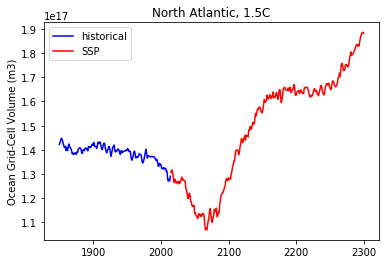

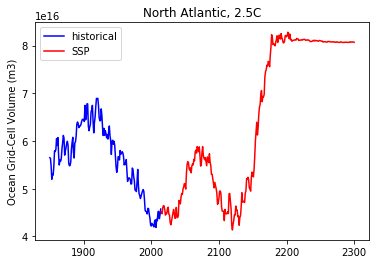

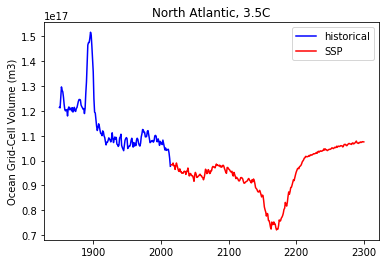

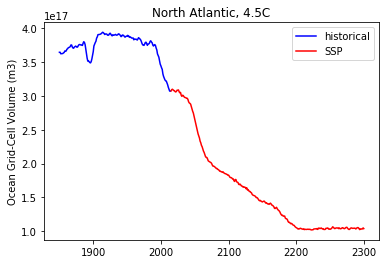

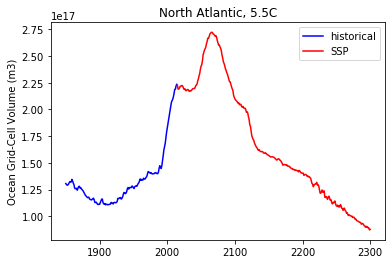

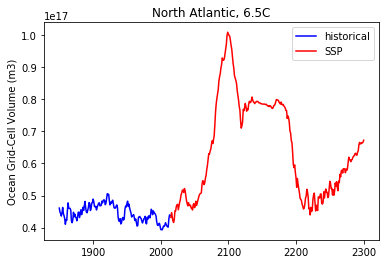

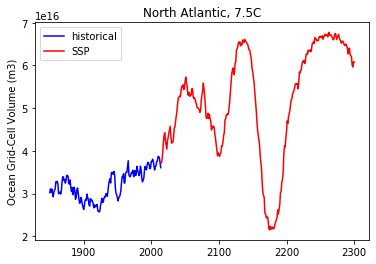

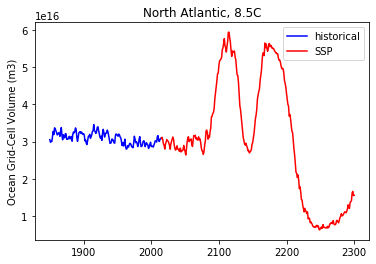

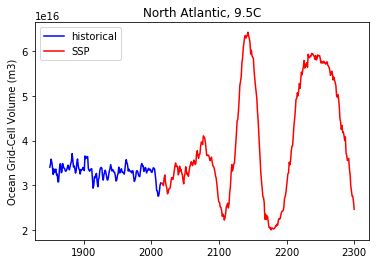

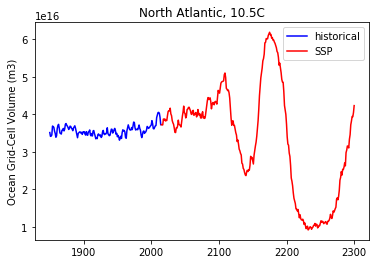

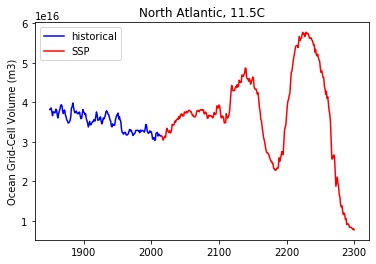

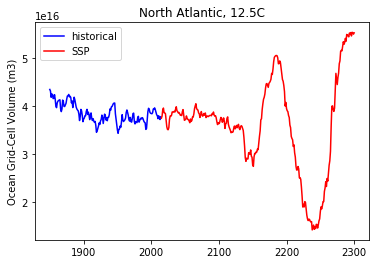

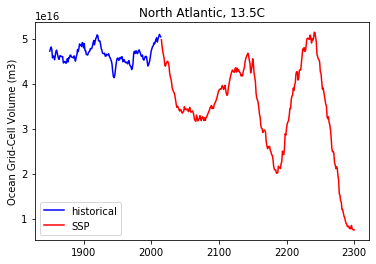

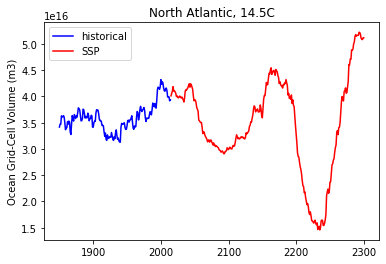

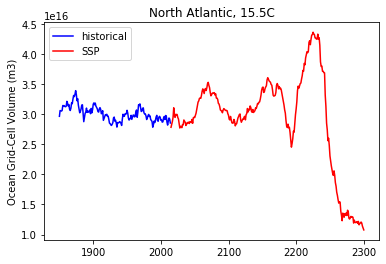

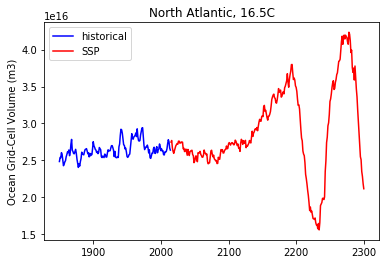

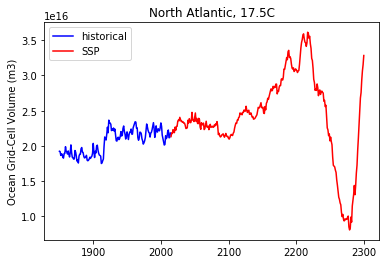

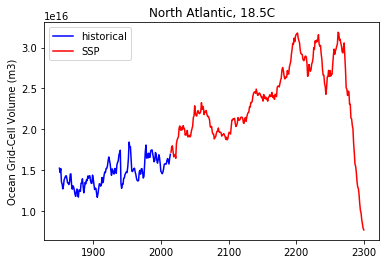

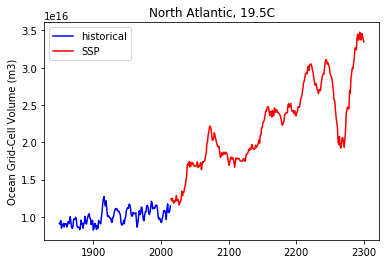

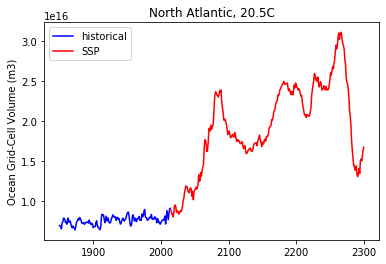

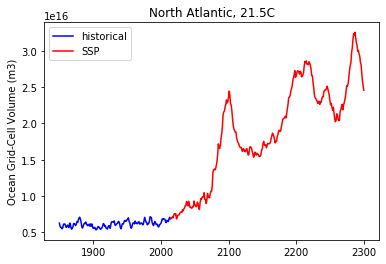

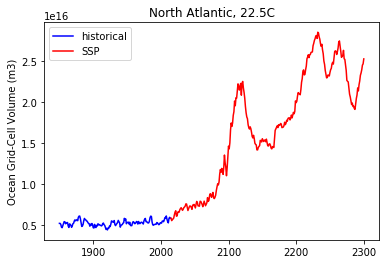

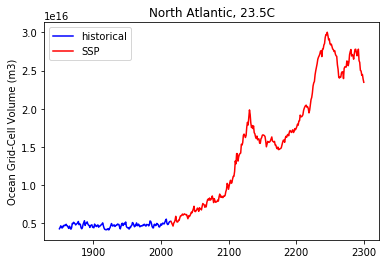

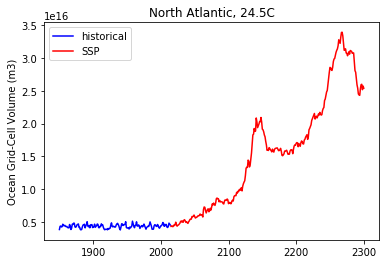

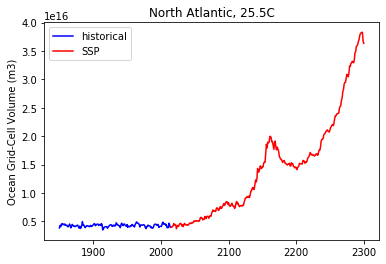

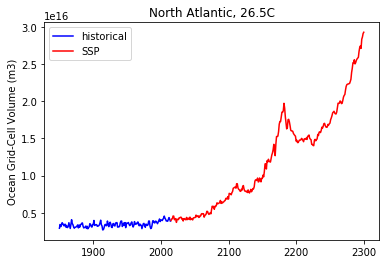

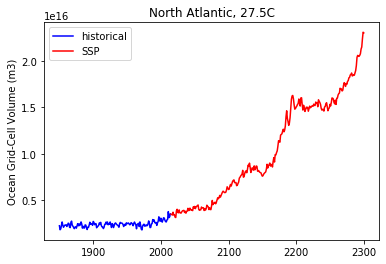

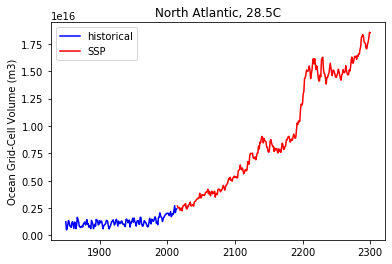

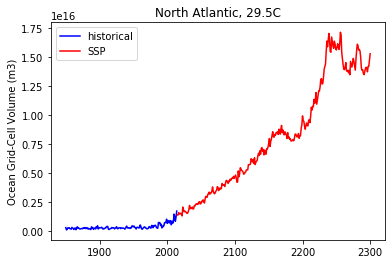

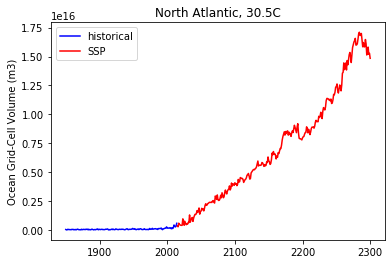

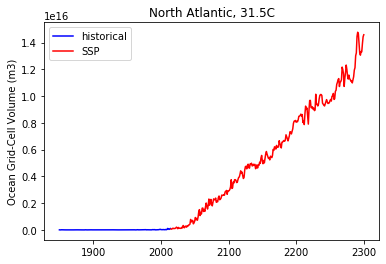

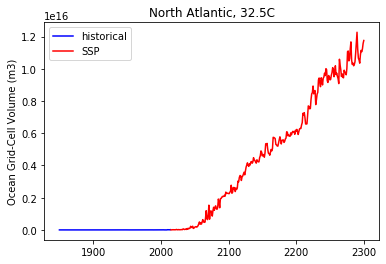

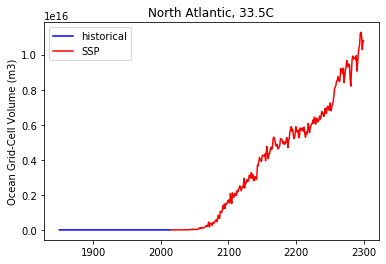

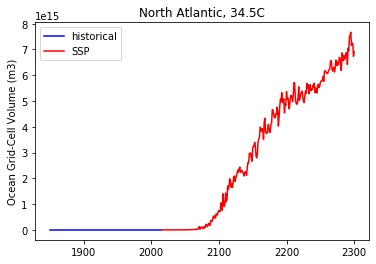

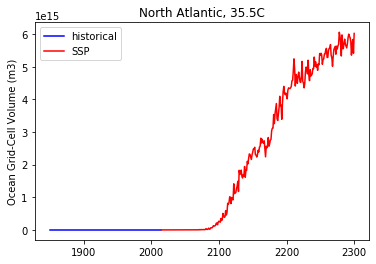

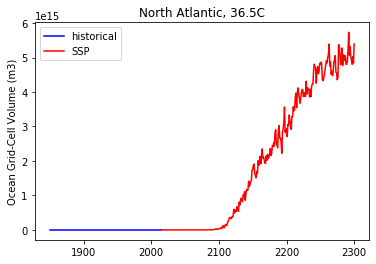

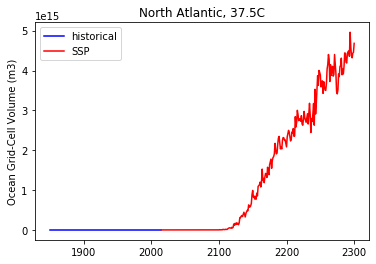

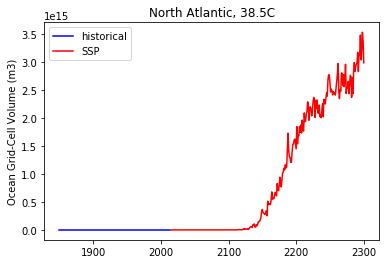

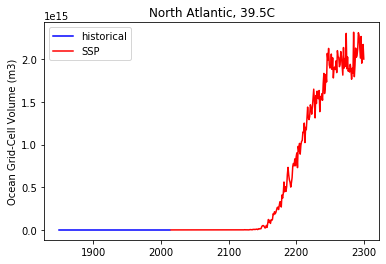

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]


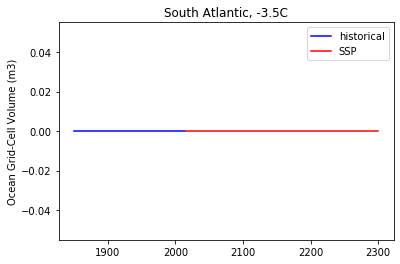

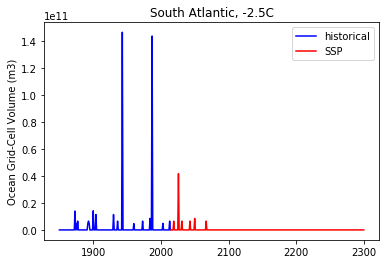

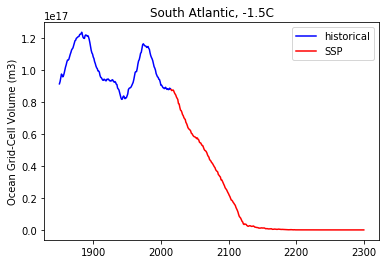

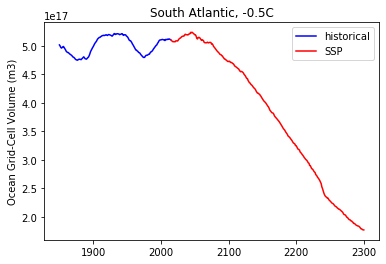

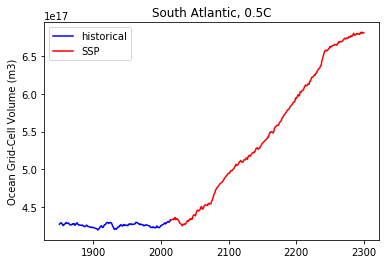

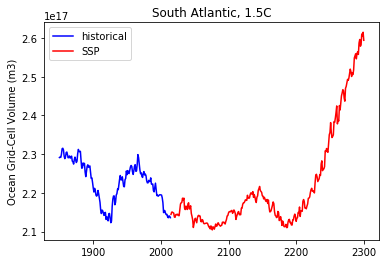

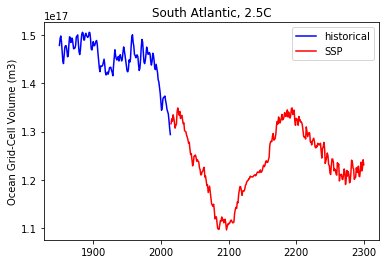

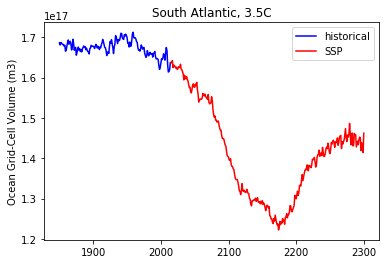

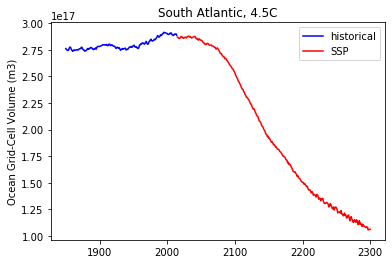

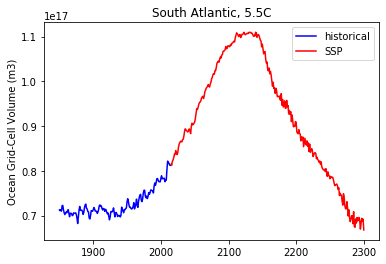

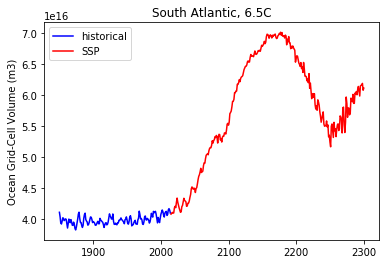

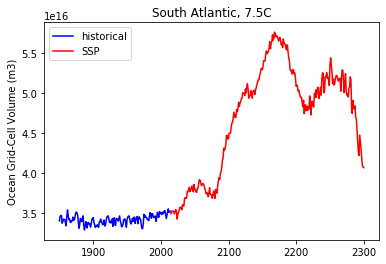

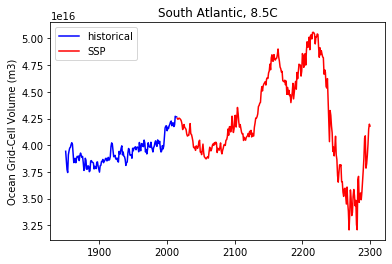

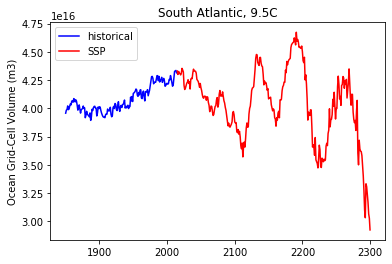

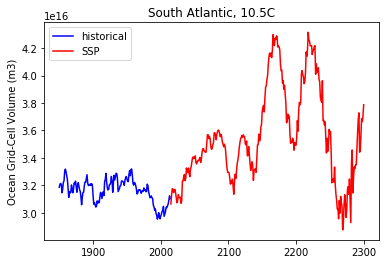

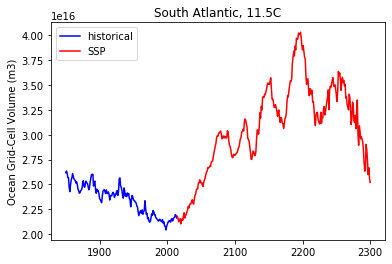

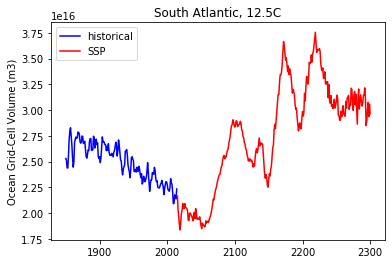

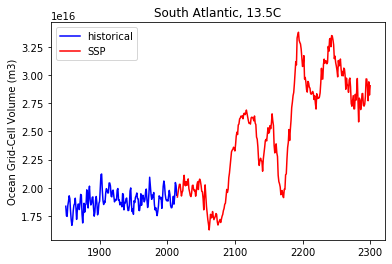

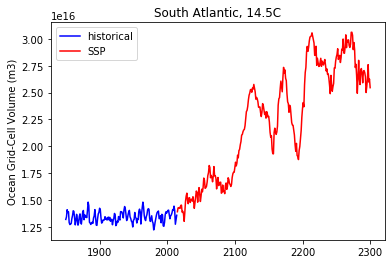

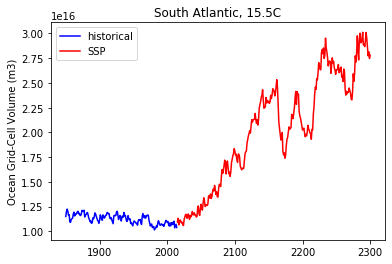

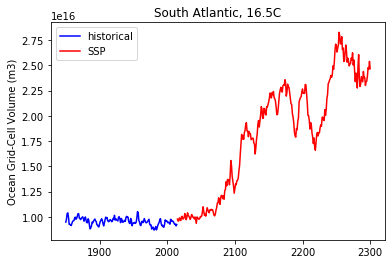

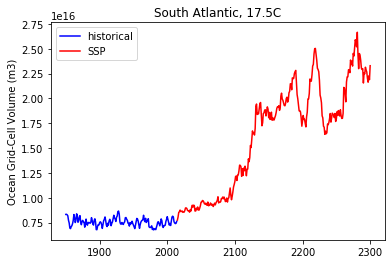

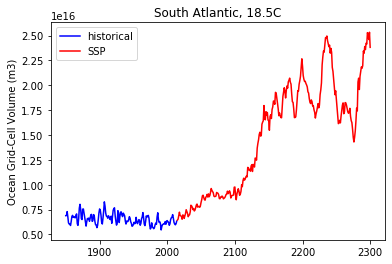

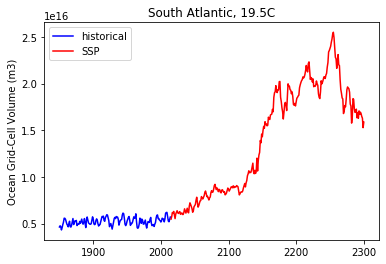

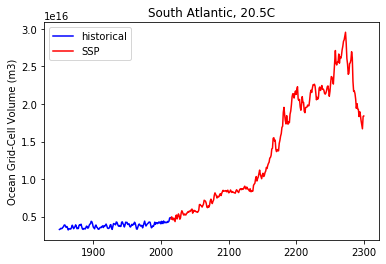

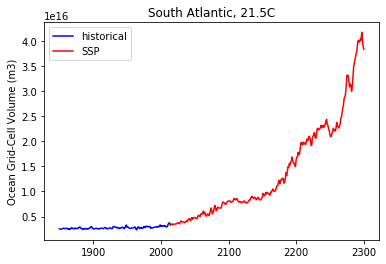

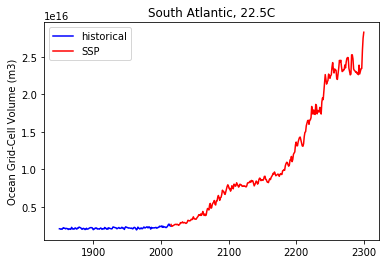

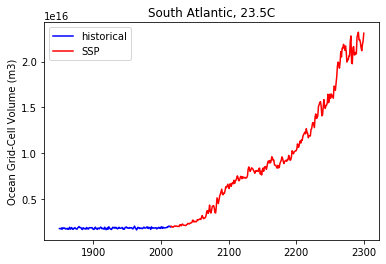

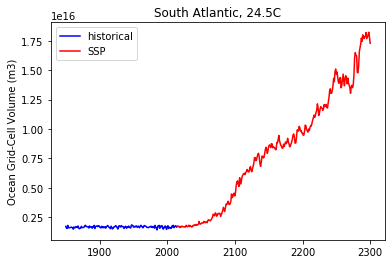

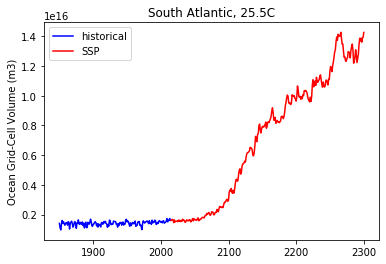

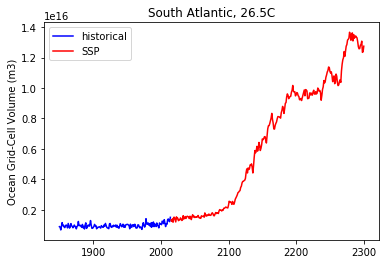

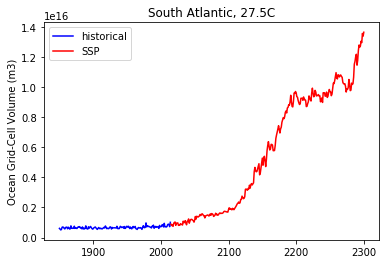

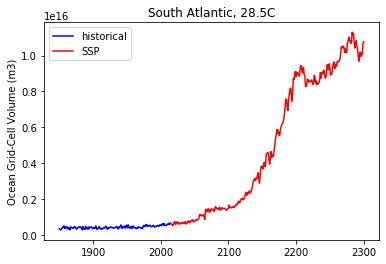

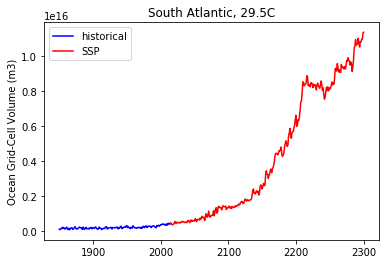

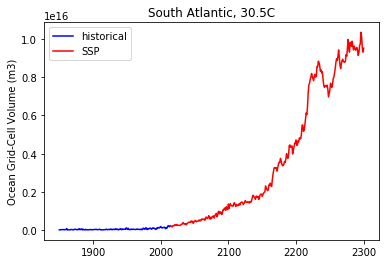

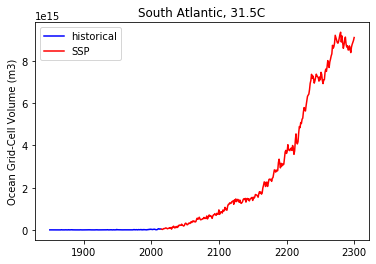

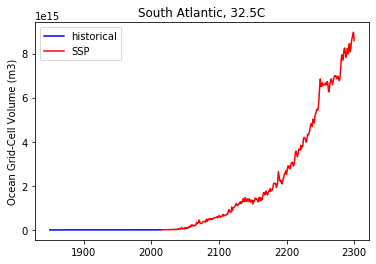

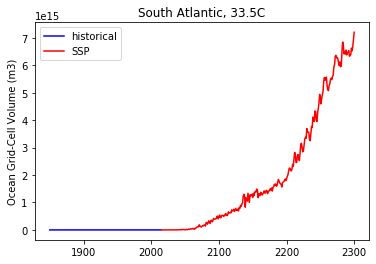

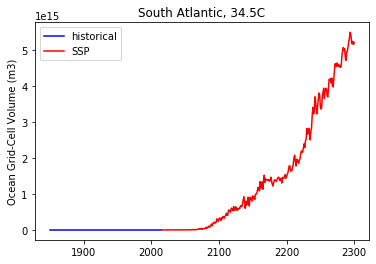

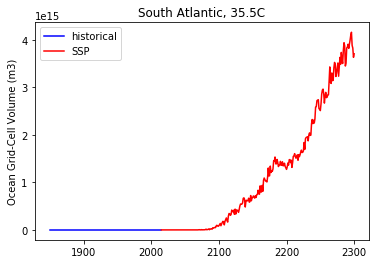

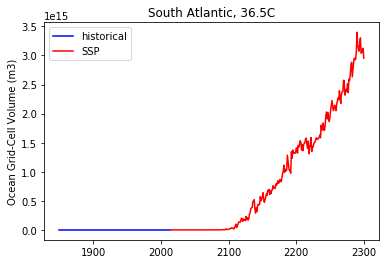

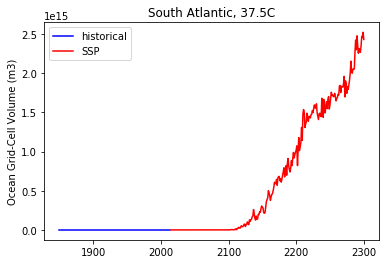

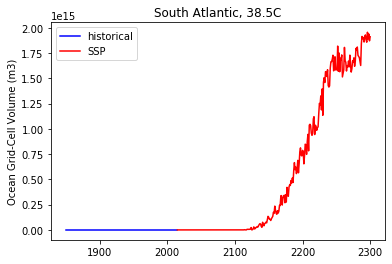

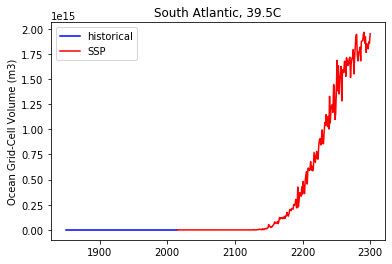

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]


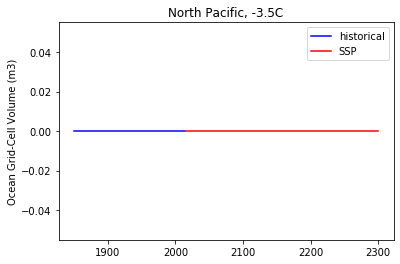

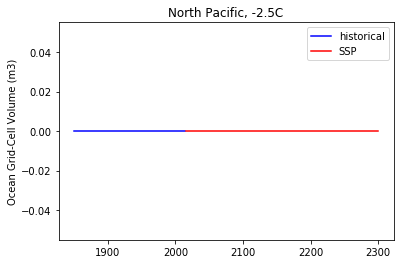

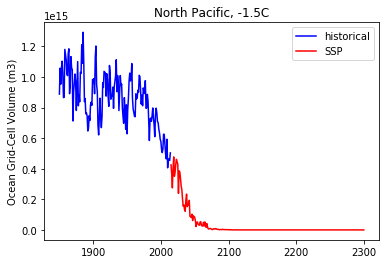

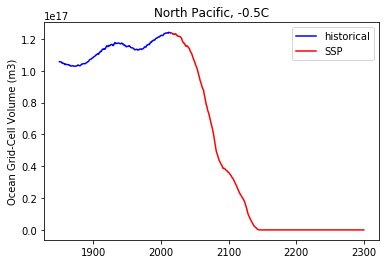

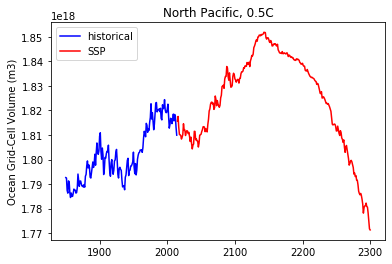

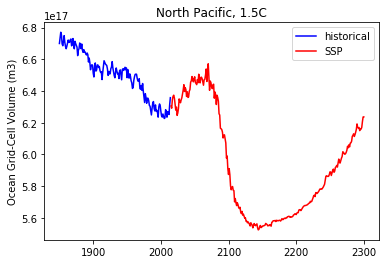

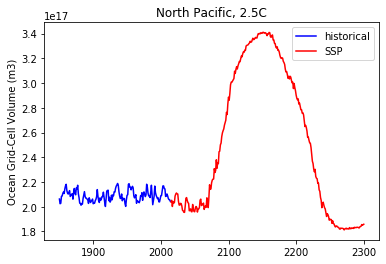

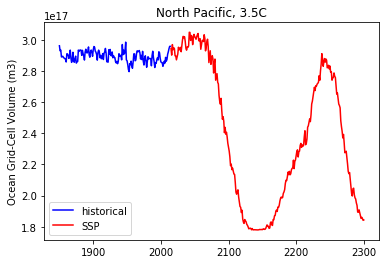

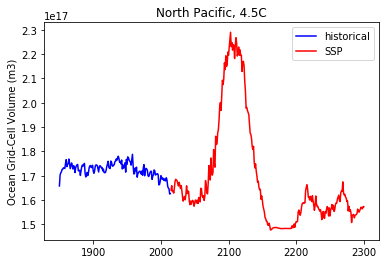

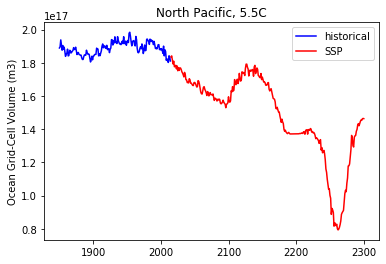

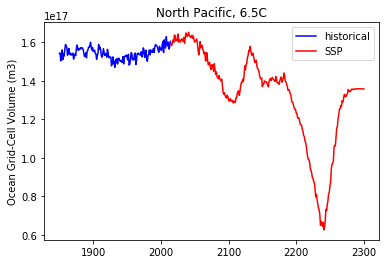

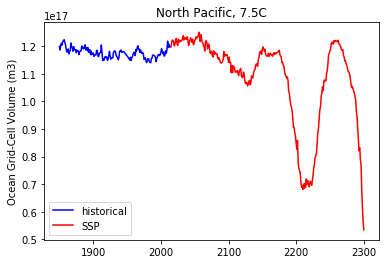

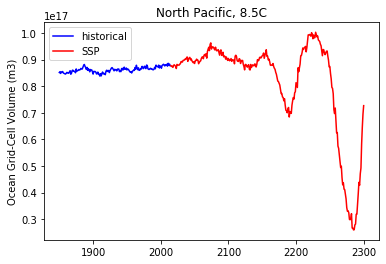

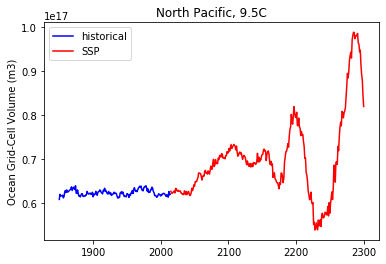

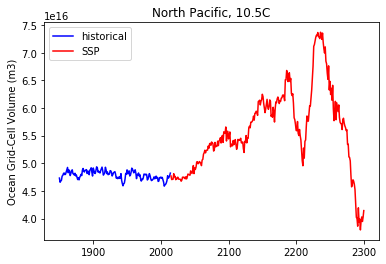

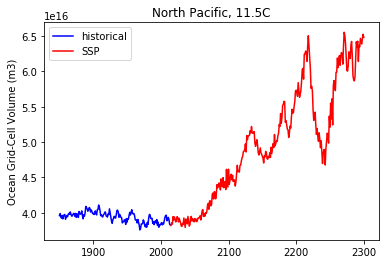

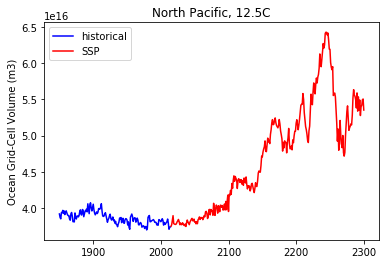

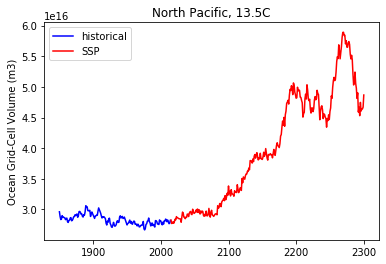

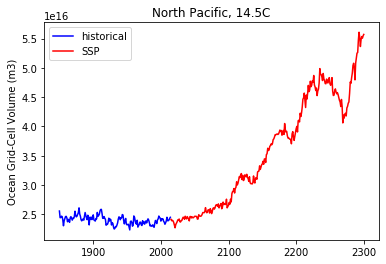

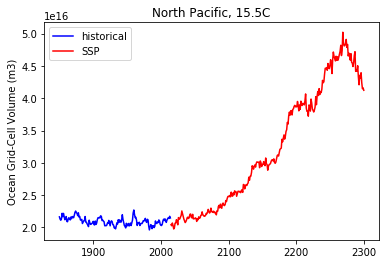

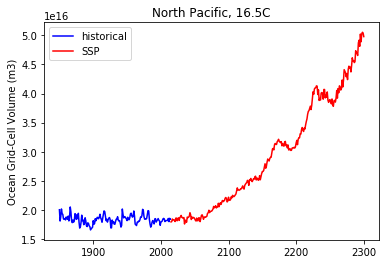

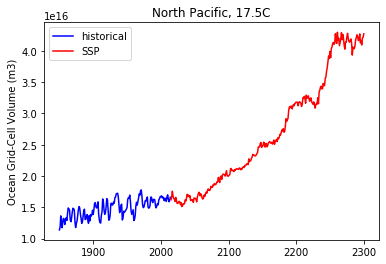

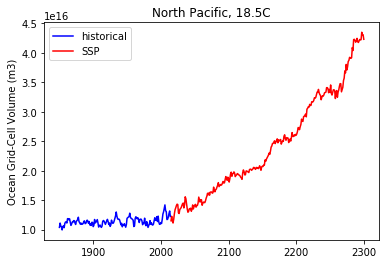

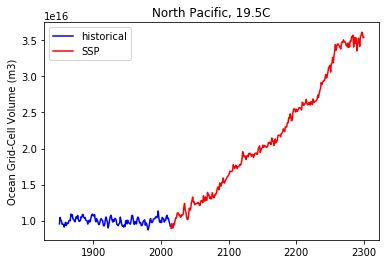

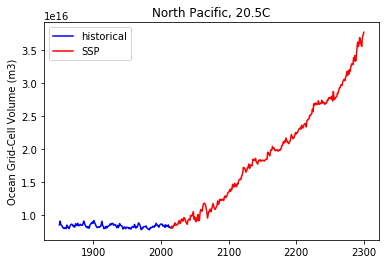

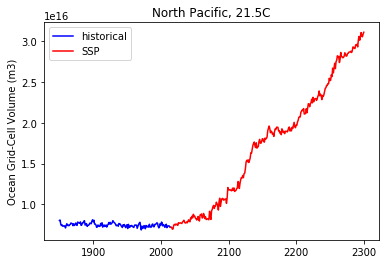

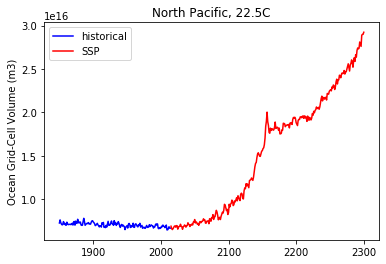

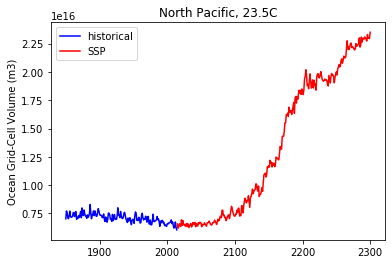

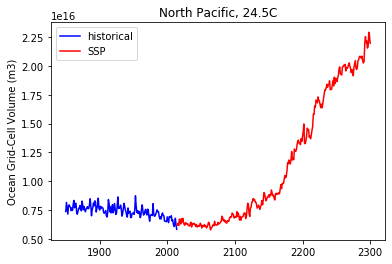

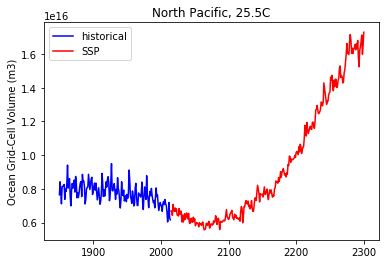

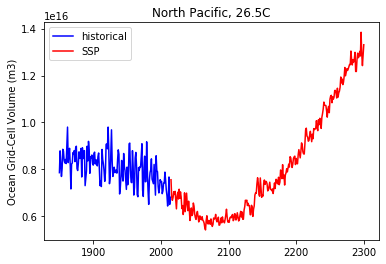

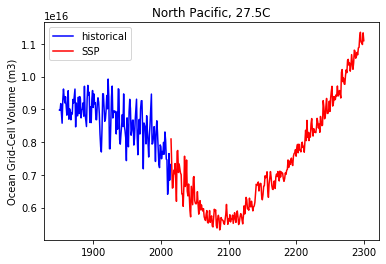

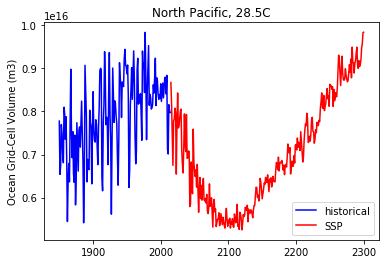

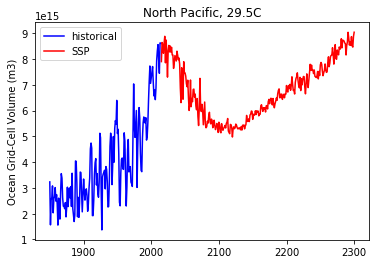

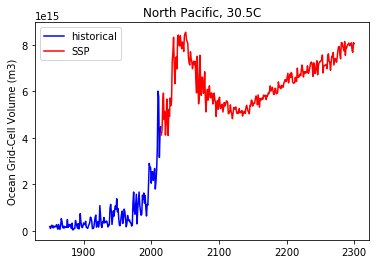

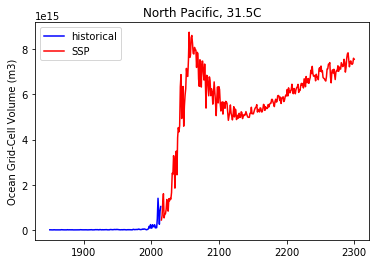

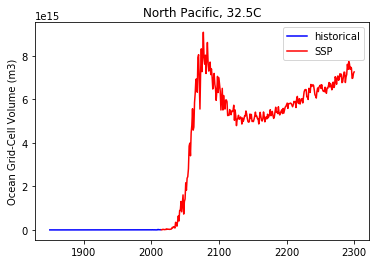

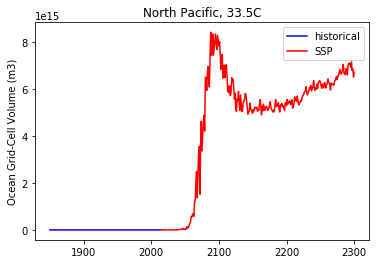

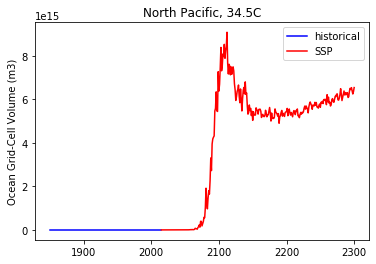

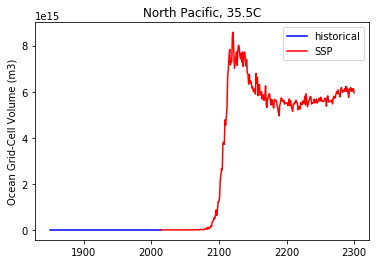

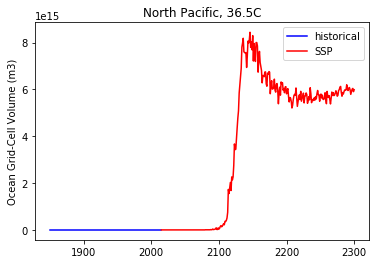

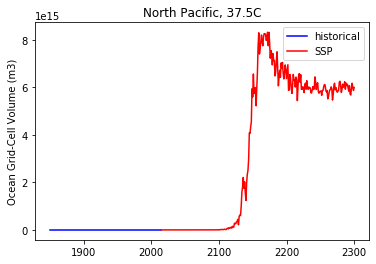

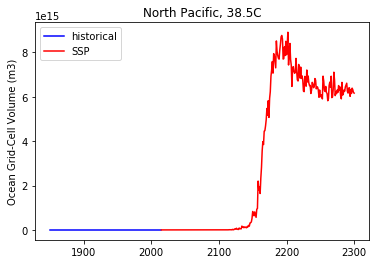

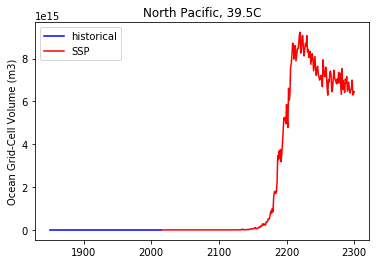

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]


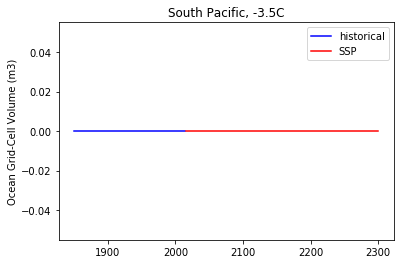

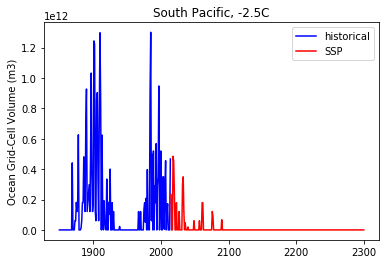

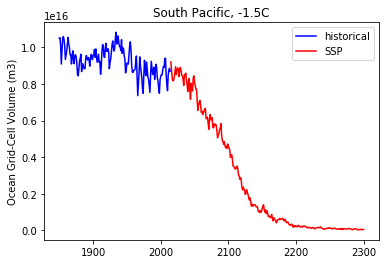

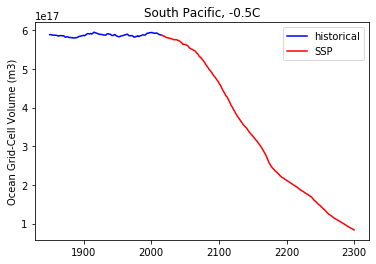

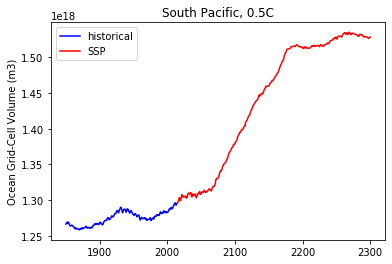

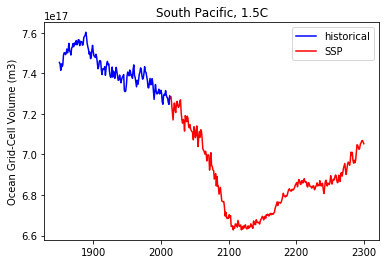

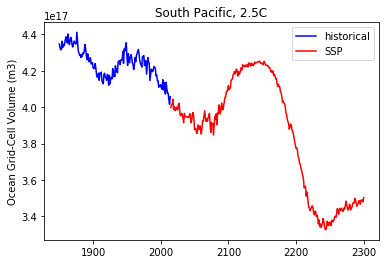

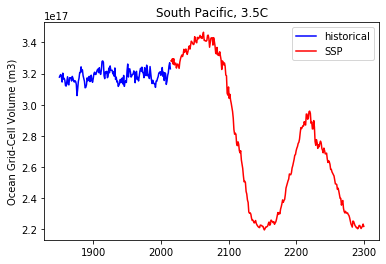

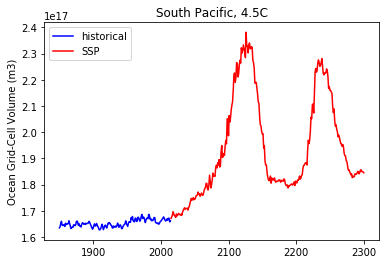

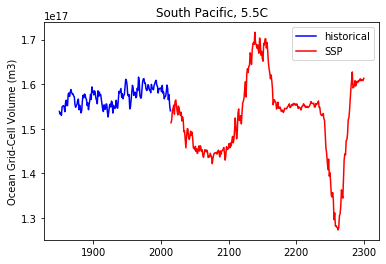

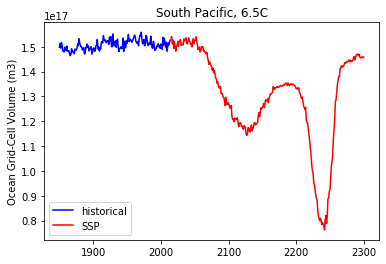

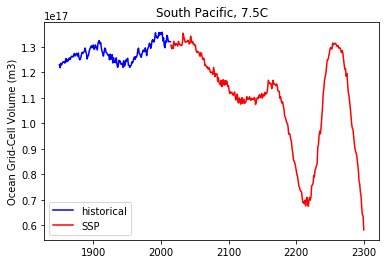

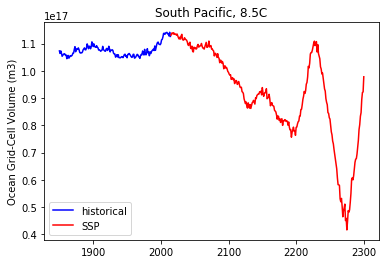

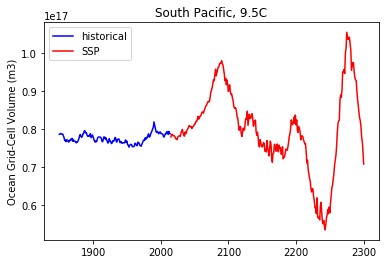

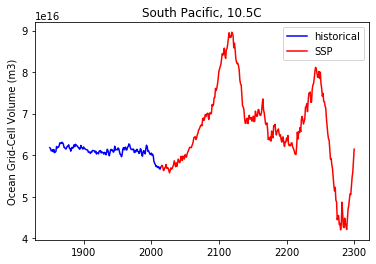

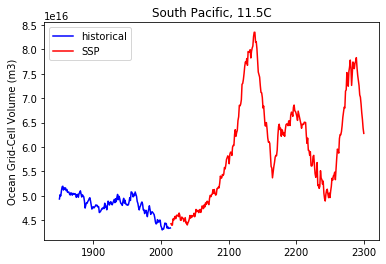

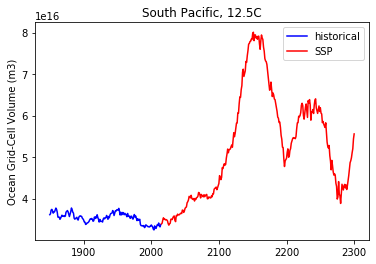

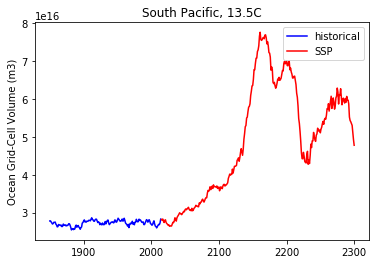

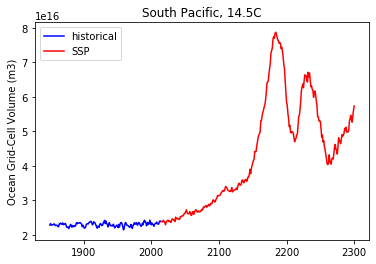

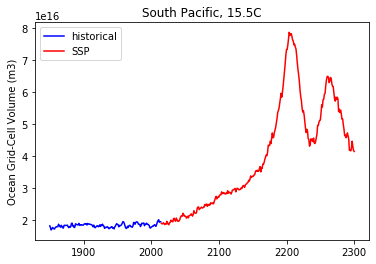

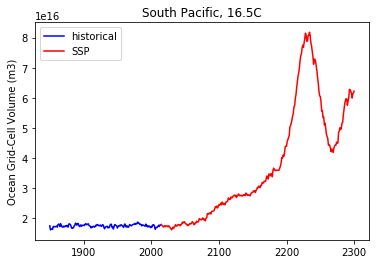

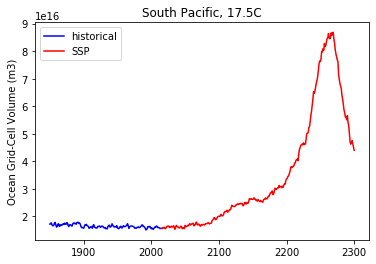

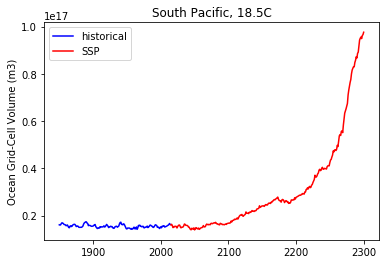

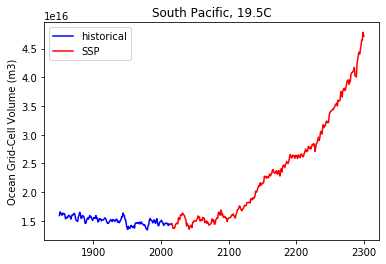

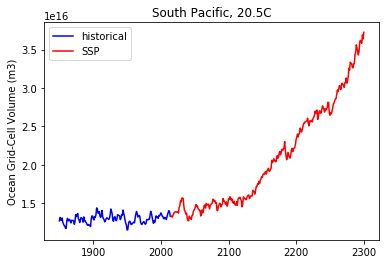

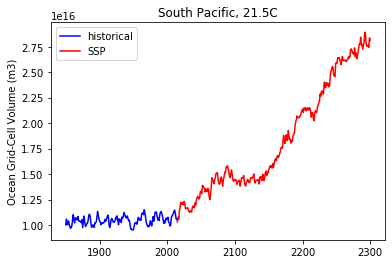

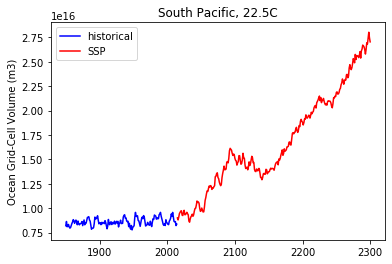

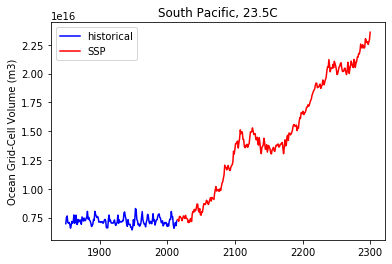

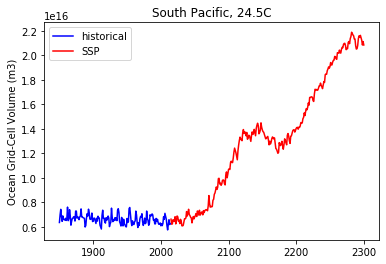

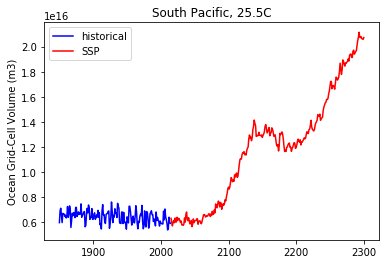

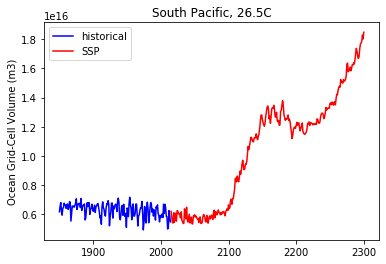

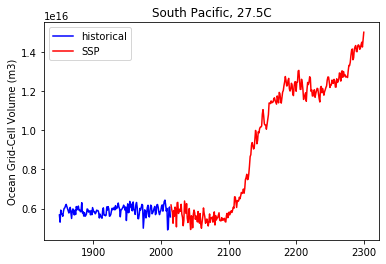

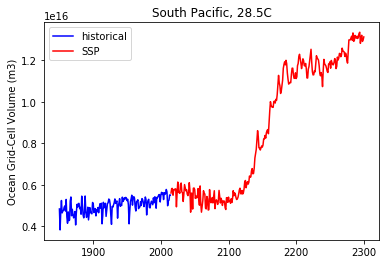

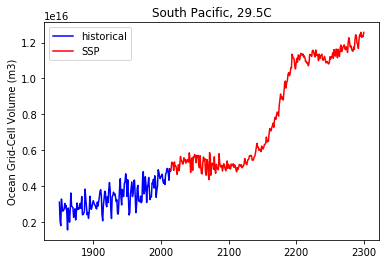

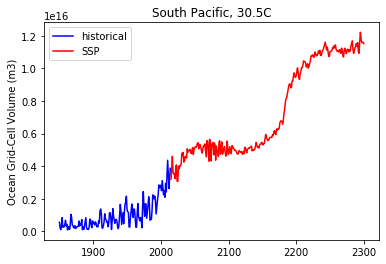

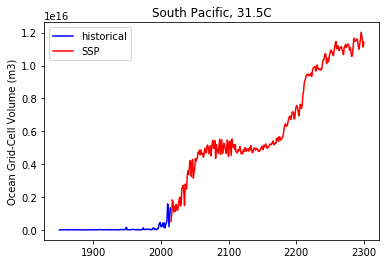

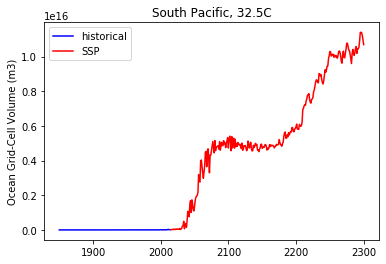

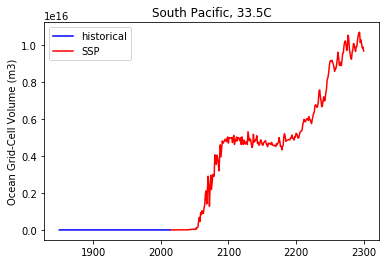

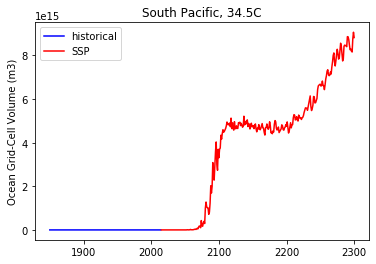

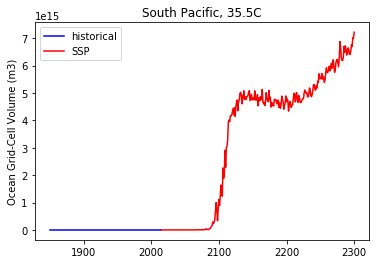

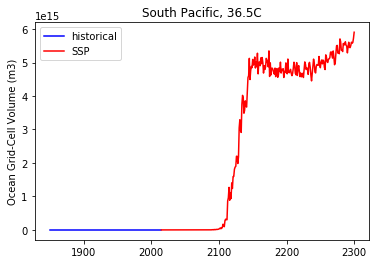

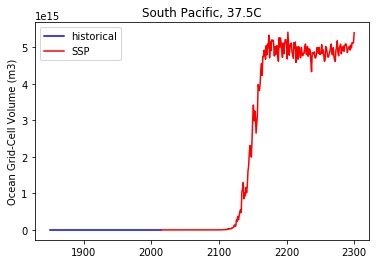

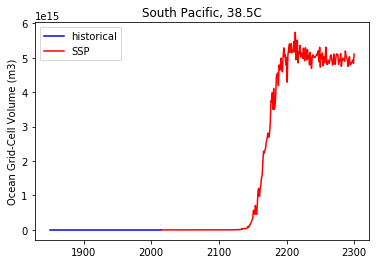

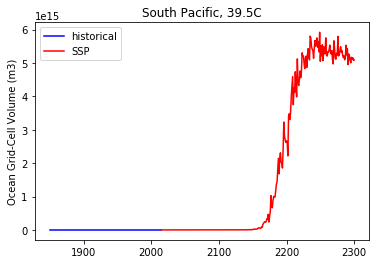

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]


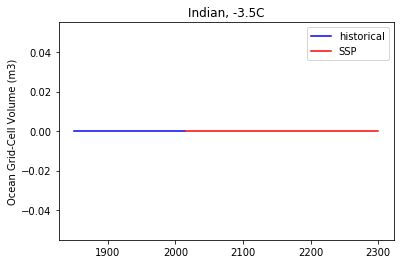

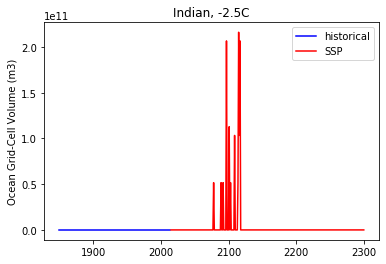

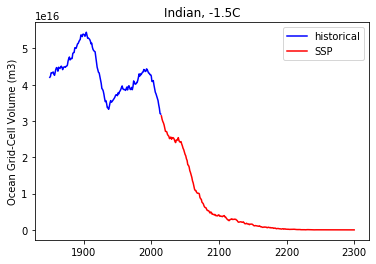

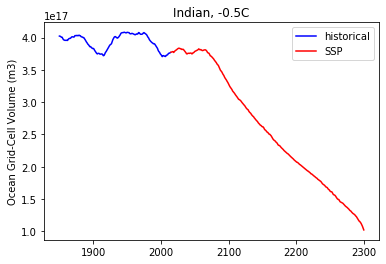

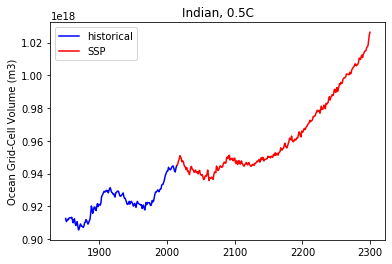

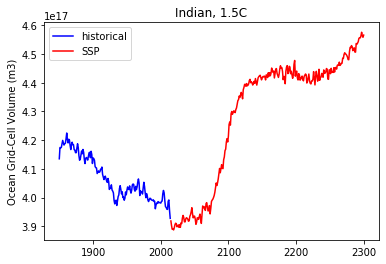

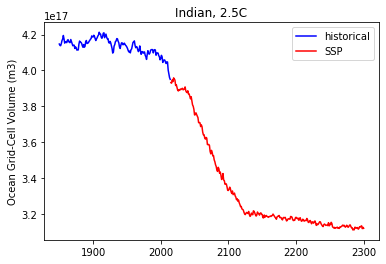

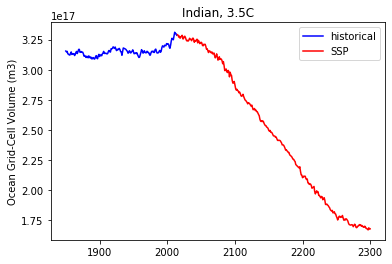

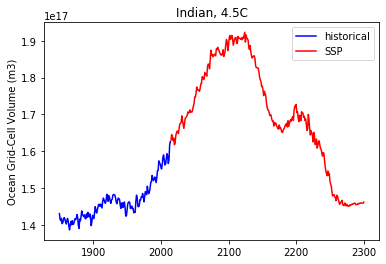

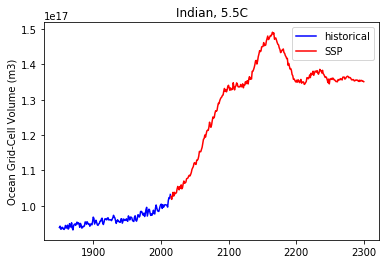

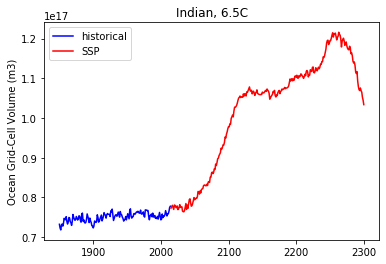

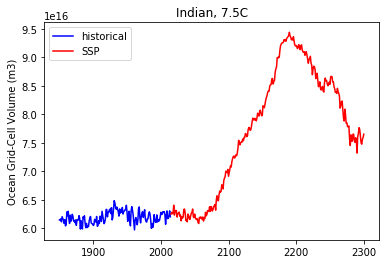

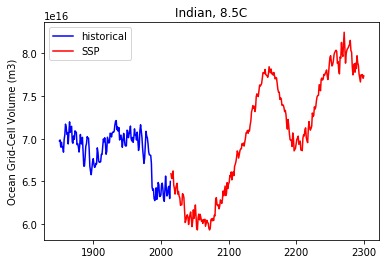

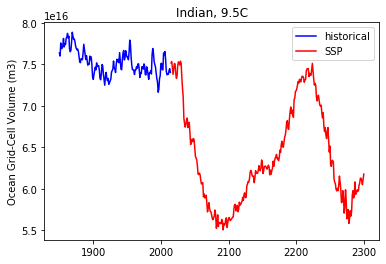

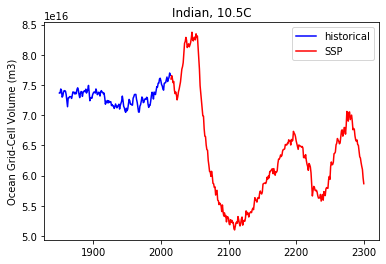

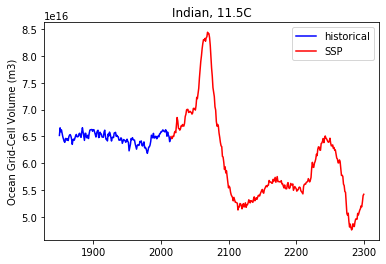

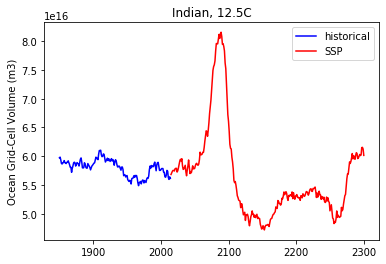

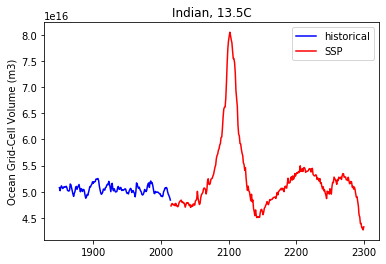

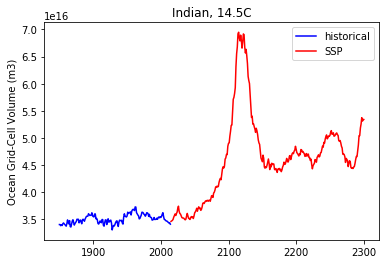

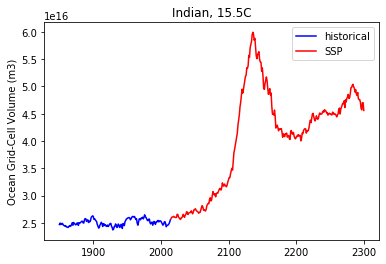

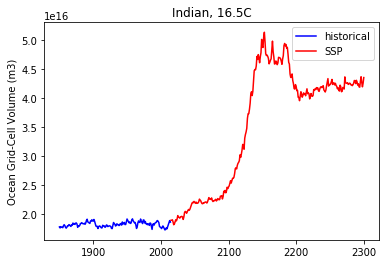

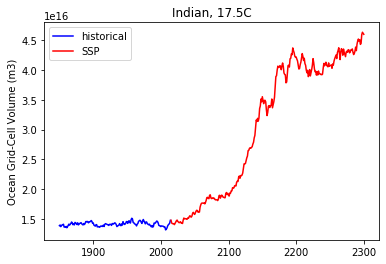

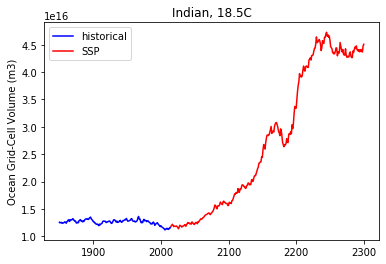

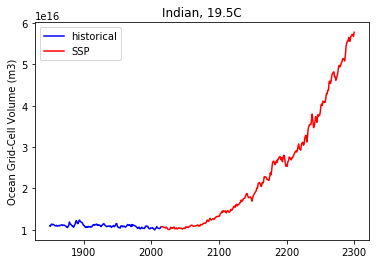

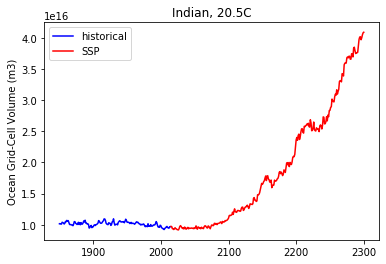

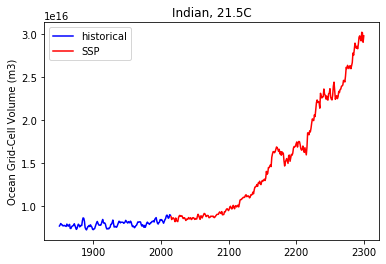

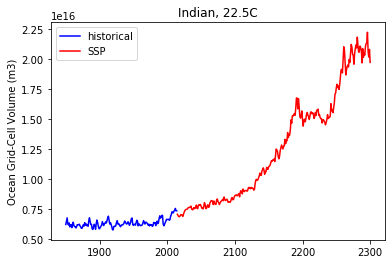

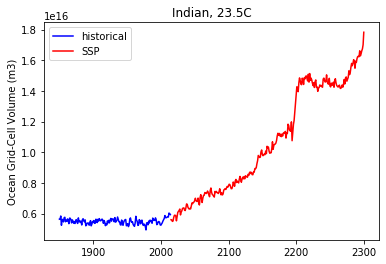

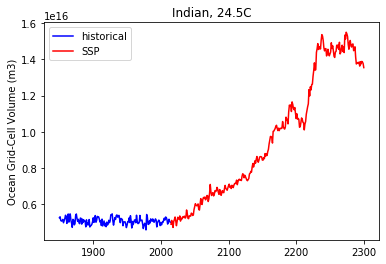

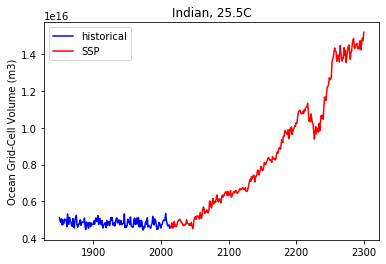

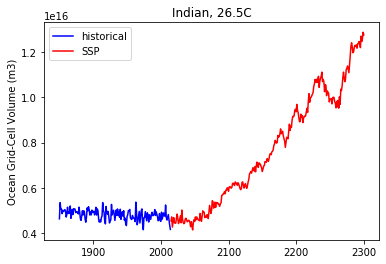

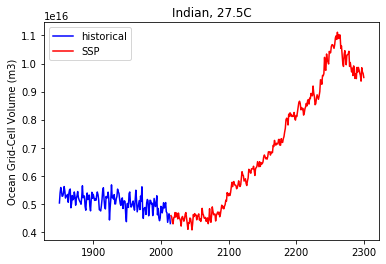

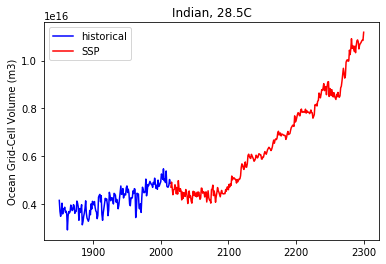

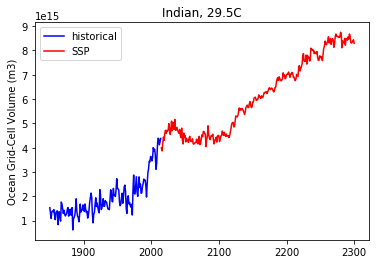

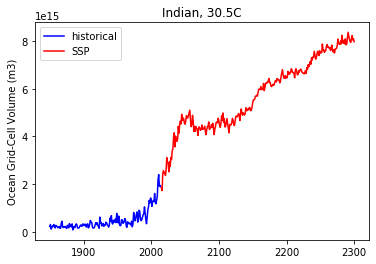

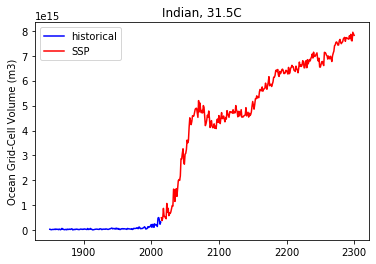

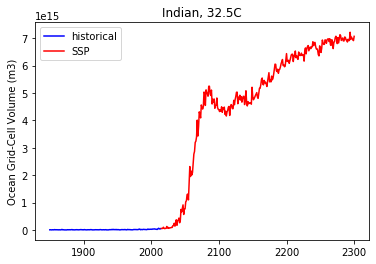

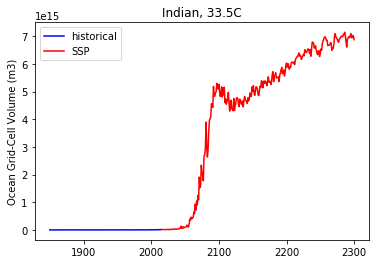

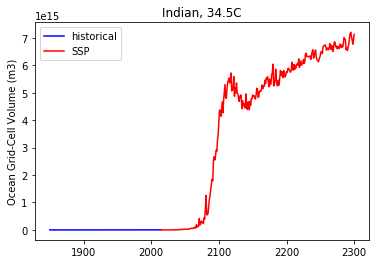

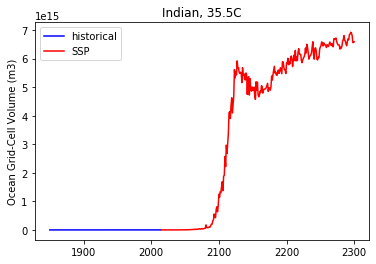

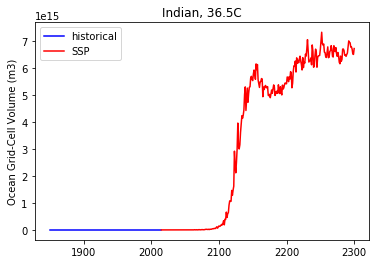

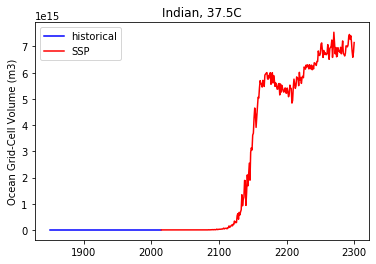

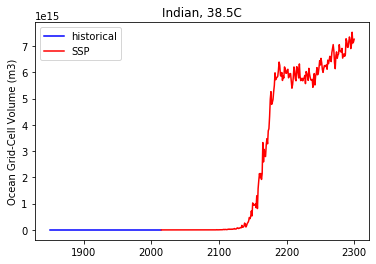

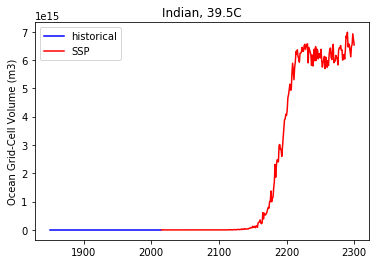

In [13]:
for basin in ['North Atlantic', 'South Atlantic', 'North Pacific', 'South Pacific', 'Indian']:
    plot_timeseries(hist_vcube, ssp_vcube, control_vcube, basin)